## Description
This dataset contains a list of video game releases and their sales worldwide from 1980 to 2016. There are 16,716 entries. The data source comes from TripleTen curriculum. 'https://practicum-content.s3.us-west-1.amazonaws.com/datasets/moved_games.csv'

#Fields include

—Name: name of video game

—Platform: console on which game was released  

—Year_of_Release: year the game was released

—Genre: game genre category 

—NA_sales (North American sales in USD million) 

—EU_sales (sales in Europe in USD million) 

—JP_sales (sales in Japan in USD million) 

—Other_sales (sales in other countries in USD million) 

—Critic_Score (maximum of 100) 

—User_Score (maximum of 10) 

—Rating (ESRB)https://www.esrb.org/ 

Data for 2016 may be incomplete.


## Objective
In this project I will do exploratory data analysis to identify patterns that determine whether a game succeeds or not. My main objective is to understand how the data is distributed and to gain insight for future decision making. A brief outline of my notebook is below.

Section 1:\
Project Description\
Objective\
Outline

Section 2:\
Data Prep\
Import Libraries\
Read in Data\
Convert columns to lowercase\
Convert data types\
Deal with missing values\
Add column for total sales

Section 3:\
Data Analysis\
Examine number of games released in different years\
Sales variations from platform to platform. Timeframe for new platforms to appear and old ones to fade.\
Bar Chart visualization on Platform sales by year\

Section 4:\
Sales Forecasting\
Top platform sales for 2014-2016\

Section 5:\
Box plot visualization on global sales 2014-2016\

Section 6:\
Scatter plot visualization based on user reviews\

Section 7:\
Same game / diff platform sales comparison analysis\

Section 8:\
Most profitable genres\
User profile for each region (NA, EU, JP)\
Top 5 platforms market share variation from region to region\
Top 5 genres\
Do ESRB ratings affect sales in indvidual regions

Section 9:\
Testing hypothesis\
-Average user ratings of the Xbox One and PC platforms are the same\
-Average user ratings for the Action and Sports genres are different\


Conclusion

# Prepare Data

In [52]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as px
import seaborn as sns 
from scipy import stats as st

### Reading in Data
Video game sales dataset. Source: TripleTen.(ref:https://practicum-content.s3.us-west-1.amazonaws.com/datasets/moved_games.csv)

In [53]:
df = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/moved_games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Convert data
We will first make all column names lowercase.
We'll add a 'total_sales' column.
Lastly we will check unique values in the user_score column but will not convert until further analysis is done.

In [54]:
# make column names lowercase using map()
df.columns = map(str.lower, df.columns)

In [55]:
#Create total_sales column
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales']

In [56]:
#Checking unique values of user_score column
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

This column contains mostly float values but with a 'tbd' string. We will not convert until further analysis is done regarding tbd value.

<br>

### Missing data
The 'name', 'year_of_release', and 'genre' columns contain an insignificant amount of missing data. We will not fill in these missing values. 

<br>
The 'critic_score', 'user_score', and 'rating' columns have missing data of 40% or more of our dataframe. This is likely due to incomplete data for 2016, new games that have not yet been rated, and/or older games where ratings were not performed or found. 
The data will be analyzed further in the next section where will we determine how to handle the data with missing values or if they'll be needed at all for our objective. For now, we will leave as is. 

In [57]:
# create variable for counting null values in each column
null_count = (df.isna().sum())

# variable to provide percent of null values in each column of dataframe
percent = ((df.isna().sum())/df.isna().count()*100)

# put results in table format for easy reading
table = pd.concat([null_count, percent], axis = 1, keys = ['Total', 'Percent'])

# print results
print(table)

                 Total    Percent
name                 2   0.011965
platform             0   0.000000
year_of_release    269   1.609333
genre                2   0.011965
na_sales             0   0.000000
eu_sales             0   0.000000
jp_sales             0   0.000000
other_sales          0   0.000000
critic_score      8578  51.319174
user_score        6701  40.089740
rating            6766  40.478612
total_sales          0   0.000000


<br>

## Analyze the data
For this data analysis I first want to categorize the data in the following ways:
- games released by year and group by era
- games by critic score rated high, medium, low
- platform by total sales rated high, medium, low
<br>

I will add these new categories to our dataframe

In [58]:
#check min and max years for our dataset
min(df['year_of_release']), max(df['year_of_release'])

(1980.0, 2016.0)

It's good practice to know what date range our dataframe contains. This one contains 36 years of gaming.

In [59]:
#count games released each year and look for trends
df['year_of_release'].value_counts().sort_index()

1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      62
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: year_of_release, dtype: int64

The number of games released throughout the years have changed quite significantly from 9 total games in 1980 to 1136 games in 2011.  The numbers seem to peak in years 2008-2009 then gradually decline. It wouldn't be fair to compare games released in the 1980's to ones released in the 2000's. 

<br>

Let's group these years into categories that better represent the different time periods of video games.

In [60]:
#create year categories
def era_group(year):
    """
    This function returns the era group for games according to year of release.
    - 'retro' for year < 2000
    - 'modern' for 2000 <= year < 2010
    - 'recent' for year >= 2010
    - 'unknown' for missing year values
     """
    if year < 2000:
        return 'retro'
    elif year < 2010:
        return 'modern'
    elif year >= 2010:
        return 'recent'
    else:
        return 'unknown'

In [61]:
#add era_group category in df using apply()
df['era_group'] = df['year_of_release'].apply(era_group)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,era_group
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,74.09,modern
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,39.47,retro
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,32.23,modern
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,29.82,modern
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,30.38,retro


In [62]:
#view era_group category
df['era_group'].value_counts().sort_index(ascending=False)

unknown     269
retro      1976
recent     5277
modern     9193
Name: era_group, dtype: int64

Now we can see the trend in number of games released from our categories; retro, modern, and recent. The greatest number of games released were in the years 2000 - 2010. 

<br>

Now let's look at how these video games rated in the critic scores. We will categorize our critic_score column into low, medium, and high scores and add the new category to our dataframe. 

In [63]:
#create score group categories with critic_score
def score_group(score):
    """
    This function returns the score group of games from 'critic_score' in groups of:
    - low for scores < 60
    - medium for scores 60 <= scores < 80
    - high for scores >= 80
    - no score for missing scores (nan)
    """
  
    if score < 60:
        return 'low'
    elif score < 80:
        return 'medium'
    elif score >= 80:
        return 'high'
    else:
        return 'no score'

In [64]:
#apply score_group to dataframe
df['score_group'] = df['critic_score'].apply(score_group)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,era_group,score_group
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,74.09,modern,medium
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,39.47,retro,no score
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,32.23,modern,high
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,29.82,modern,high
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,30.38,retro,no score


In [65]:
#analyze score_group category
df['score_group'].value_counts()

no score    8578
medium      4212
high        2012
low         1913
Name: score_group, dtype: int64

More than half of our dataframe are missing critic scores. The games we do have scores for rated in the medium category scoring between 60-80 out of a possible 100.

<br>

Now we'll take a look at how each platformm performed in overall sales. 

In [66]:
#view numbers of each platform in dataframe
df['platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

We can see that PS2 and DS have the most number of games released in our dataset. 

<br>

Let's take a look at how each platform performed for total sales.

In [67]:
#view total sales by platform
platform_sales = df.groupby('platform')['total_sales'].sum()
print(platform_sales.sort_values())

platform
PCFX       0.03
GG         0.04
3DO        0.10
TG16       0.16
WS         1.42
NG         1.44
SCD        1.81
DC        15.68
GEN       29.80
SAT       33.52
PSV       47.61
WiiU      76.24
2600      96.07
XOne     145.05
GC       193.75
SNES     196.82
N64      214.30
PC       237.14
3DS      245.64
NES      245.74
GB       247.26
XB       249.02
PSP      252.63
PS4      265.79
GBA      310.12
PS       689.95
DS       746.86
PS3      803.97
Wii      828.44
X360     885.66
PS2     1062.33
Name: total_sales, dtype: float64


PS2 is leading in number of sales. Interestingly, although DS has more released games, it falls behind X360, Wii, and PS3 in the sales category. 

<br>

<br>
Let's add the platform total sales column to our dataframe

In [68]:
#create a platform total sales column in dataframe
df['platform_sales'] = df.groupby('platform')['total_sales'].transform('sum')
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,era_group,score_group,platform_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,74.09,modern,medium,828.44
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,39.47,retro,no score,245.74
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,32.23,modern,high,828.44
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,29.82,modern,high,828.44
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,30.38,retro,no score,247.26
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,29.68,retro,no score,247.26
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,26.92,modern,high,746.86
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,26.07,modern,low,828.44
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,26.08,modern,high,828.44
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,27.84,retro,no score,245.74


<br>

Now we'll create platform total sales categories in our dataframe. The categories will range as follows:
<br>

- low sales for sales below 100 million
- medium sales for sales between 100 and 500 million
- and high sales for sales over 500 million

In [69]:
#categorize platform sales

def platform_sales_group(total_sales):
    """
    This function returns the total_sales group of gaming platforms from 'platform' in groups of:
    - low for total_sales < 100
    - medium for total_sales 100 <= sales < 500
    - high for total_sales >= 500
    - no sales for missing sales (nan)
    """
  
    if total_sales < 100:
        return 'low'
    elif total_sales < 500:
        return 'medium'
    elif total_sales >= 500:
        return 'high'
    else:
        return 'no sales'

In [70]:
#apply function to platform_sales column
df['platform_sales'].apply(platform_sales_group)

0          high
1        medium
2          high
3          high
4        medium
          ...  
16710      high
16711      high
16712       low
16713    medium
16714       low
Name: platform_sales, Length: 16715, dtype: object

<br>

Now that we have our platform total sales in groups of low, medium, and high, let's add this information into our dataframe.

In [71]:
#create platform_sales_group column in dataframe
df['platform_sales_group'] = df['platform_sales'].apply(platform_sales_group)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,era_group,score_group,platform_sales,platform_sales_group
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,74.09,modern,medium,828.44,high
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,39.47,retro,no score,245.74,medium
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,32.23,modern,high,828.44,high
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,29.82,modern,high,828.44,high
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,30.38,retro,no score,247.26,medium


<br>

Now we'll use our new categories and aggregate the data to show distribution of high selling platforms each year!  

In [72]:
#create high_sales variable to group
high_sales = df[df['platform_sales_group'] == 'high']

#aggregate the high_sales platforms to existing columns of our dataframe
agg_high_sales = high_sales.groupby(['platform', 'year_of_release']).agg({'total_sales': 'sum'}).reset_index()

#show results
print(agg_high_sales)

   platform  year_of_release  total_sales
0        DS           1985.0         0.02
1        DS           2004.0        15.91
2        DS           2005.0       119.34
3        DS           2006.0       111.64
4        DS           2007.0       135.85
..      ...              ...          ...
62     X360           2012.0        91.45
63     X360           2013.0        80.82
64     X360           2014.0        31.61
65     X360           2015.0        10.86
66     X360           2016.0         1.40

[67 rows x 3 columns]


<br>

Now that our data is aggregated, let's create visuals to see how each platform performed over the years.

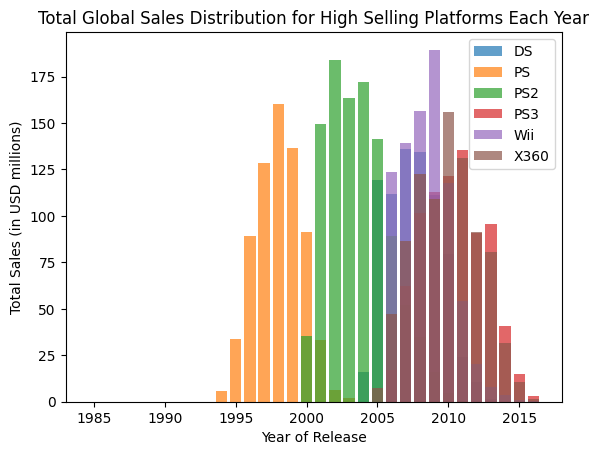

In [73]:
#create bar charts for each platform showing the sales each year.
for platform in agg_high_sales['platform'].unique():
    platform_data = agg_high_sales[agg_high_sales['platform'] == platform]
    plt.bar(platform_data['year_of_release'], platform_data['total_sales'], label=platform, alpha=0.7)
   
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (in USD millions)')
plt.title('Total Global Sales Distribution for High Selling Platforms Each Year')
plt.legend()
plt.show()

All of the platforms show a similar lineage. Each one has about 11 years from the time of release before the sales go to 0. They take off in their second year and begin to decline in their seventh. From a sales standpoint, we can see that platforms have about a 5 year run on popularity before a new one reigns. Except for PS3 and X360 had a little bit longer of a stretch before they began to fade. Wii is also an exception as it took off in it's first year and started declining in year 5. But it still had a good four year run. <br>
To predict which platform will lead in sales in 2017 we need to look at a period of 5 years. Let's dive in!

<br>

We want to see which platform will have the highest global sales for 2017. Based on our information above, we want to look atleast the last 2 years of sales. However, since our data is incomplete for 2016, we'll use data from 2014 - 2016 to give us good solid numbers. Remember, most platforms take off in their second year and peak for 5 years. Let's see who's sales are starting to increase!

## Sales Forecasting

Since we are only interested in next years sales, we'll go ahead and drop anything prior to 2014 from our dataframe. If we decide we need anything later, we can always add it back in. 

In [74]:
#drop rows prior to 2014
new_df = df[df['year_of_release'] >= 2014]
new_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,era_group,score_group,platform_sales,platform_sales_group
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,12.25,recent,no score,265.79,medium
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,10.65,recent,high,265.79,medium
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,10.94,recent,no score,245.64,medium
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,7.30,recent,high,265.79,medium
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,6.70,recent,no score,265.79,medium


<br>

Let's look at which platforms are within our new dataframe

In [75]:
new_df['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

<br>

Now let's take a look at platform sales groups for our new dataframe and see our movers and shakers!
<br>
We'll take a look at our 'high', 'medium', and 'low' categories. 
<br>
Our 'high' sales platforms could be our next leaders but they could also be our faders. This is why we want to look at all groups to see who is on the rise and who is fading out.

In [76]:
#view our 'high' platfrom sales group.
current_sales_leaders = new_df[new_df['platform_sales_group'] == 'high']

#group data
group_leaders = current_sales_leaders.groupby(['platform', 'year_of_release']).agg({'total_sales': 'sum'}).reset_index()

print(group_leaders)

  platform  year_of_release  total_sales
0      PS3           2014.0        40.88
1      PS3           2015.0        14.70
2      PS3           2016.0         3.23
3      Wii           2014.0         3.45
4      Wii           2015.0         1.05
5      Wii           2016.0         0.17
6     X360           2014.0        31.61
7     X360           2015.0        10.86
8     X360           2016.0         1.40


Our 'high' platform sales leaders are PS3, Wii, and X360. We know that these players are our faders based on our distribution charts from above. So they will not be in the 'high' sales category in 2017 since that wouldn't follow our distribution pattern.

<br>

Let's take a look at our 'medium' players and see who shows up.

In [77]:
#view our medium platform sales group
mid_sales_leaders = new_df[new_df['platform_sales_group'] == 'medium']

#group data
mid_group_leaders = mid_sales_leaders.groupby(['platform', 'year_of_release']).agg({'total_sales': 'sum'}).reset_index()

print(mid_group_leaders)

   platform  year_of_release  total_sales
0       3DS           2014.0        41.75
1       3DS           2015.0        26.75
2       3DS           2016.0        14.50
3        PC           2014.0        12.38
4        PC           2015.0         7.93
5        PC           2016.0         4.89
6       PS4           2014.0        84.22
7       PS4           2015.0       100.44
8       PS4           2016.0        59.01
9       PSP           2014.0         0.24
10      PSP           2015.0         0.12
11     XOne           2014.0        49.26
12     XOne           2015.0        54.67
13     XOne           2016.0        23.91


**Enter in our new players! 3DS, PC, PS4, XOne.**

<br>
<br>

Now let's take a look at our 'low' sales platform to see who's just getting their foot in the door.

In [78]:
#view our low platform sales group
low_sales = new_df[new_df['platform_sales_group'] == 'low']

#group data
low_group = low_sales.groupby(['platform', 'year_of_release']).agg({'total_sales': 'sum'}).reset_index()

print(low_group)

  platform  year_of_release  total_sales
0      PSV           2014.0        10.56
1      PSV           2015.0         5.93
2      PSV           2016.0         4.10
3     WiiU           2014.0        20.35
4     WiiU           2015.0        15.22
5     WiiU           2016.0         4.25


**Enter in two new players, PSV and WiiU!** 

<br>

**Summary** Based on our distribution charts above, we can summarize that our 'high' sales platforms will likely have bottomed out in 2017. 
<br>
Our 'low' sales platforms are our newer guys so they likely won't be leading in sales for 2017 but could be front runners in the following years. However, Wii doesn't follow the traditional distribution. Unlike the others, it's sales skyrocket in year 1, peak in year 4, and then plummet. It's newer version could do the same.
<br>
Our 'medium' sales platforms are likely the ones that will be taking off in 2017 since we tend to see the sales peak in years 3-6.

<br>

## Sales Distributions by Platform 2014-2016
Now let's take a look at all video game sales distributions for our new dataframe and see what they are doing. We'll separate them by platform like we did above.

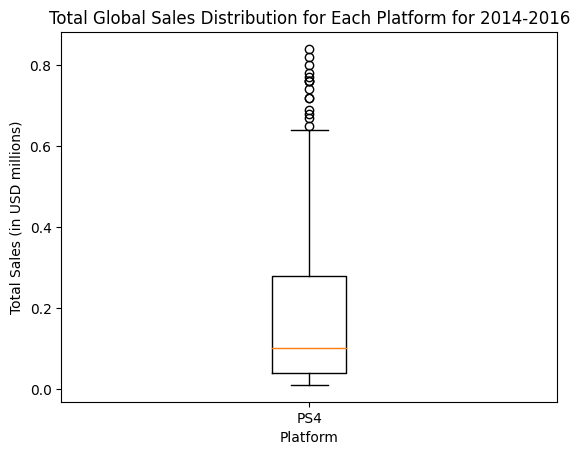

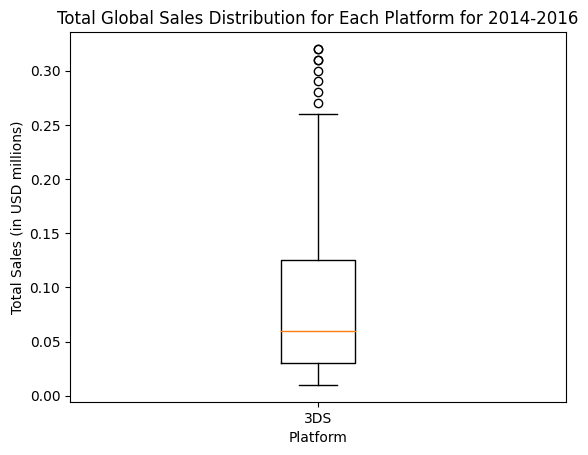

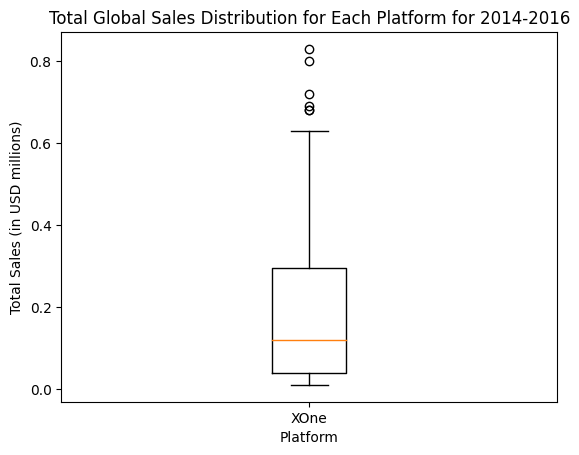

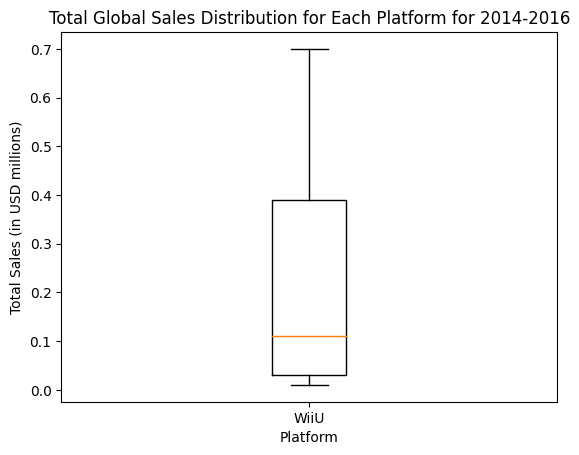

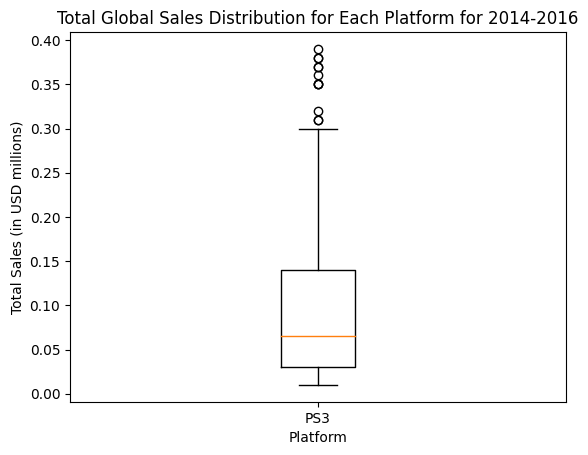

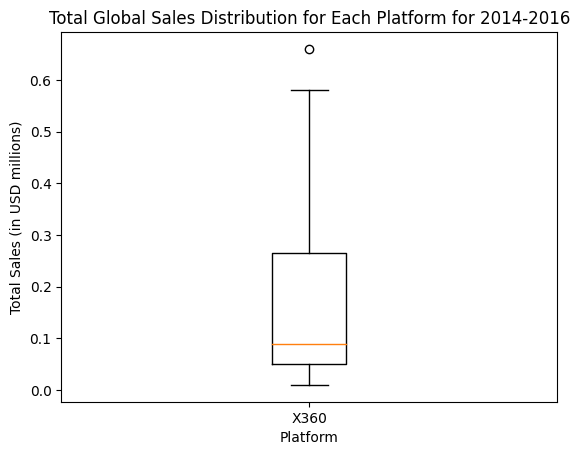

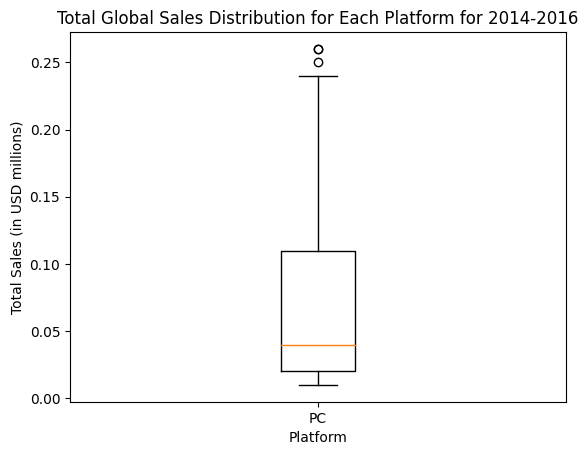

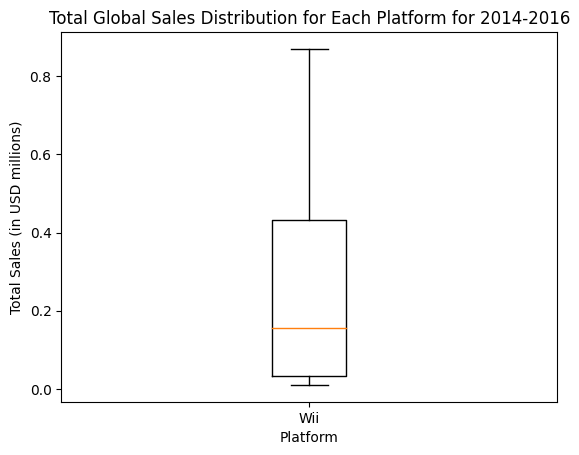

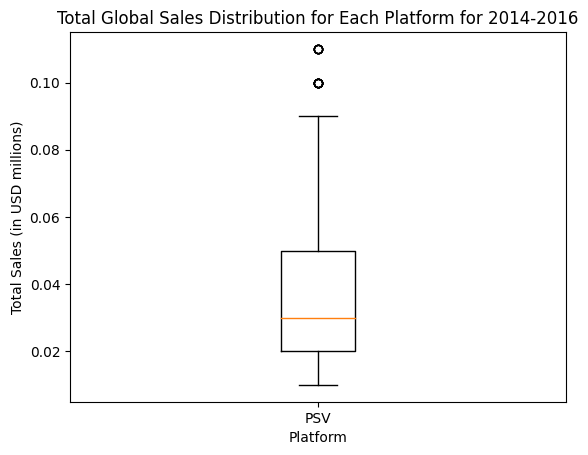

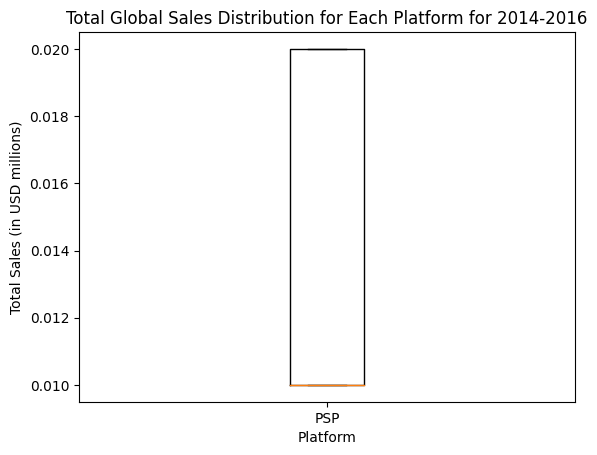

In [79]:
#filter data for boxplots
for platform in new_df['platform'].unique():
    platform_data = new_df[new_df['platform'] == platform]['total_sales']
    
    # Calculate Q1, Q2, and IQR for each platform's data
    Q1 = platform_data.quantile(0.25)
    Q3 = platform_data.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q1 + 1.5 * IQR
    
    filtered_data = platform_data[(platform_data >= lower_bound) & (platform_data <= upper_bound)]
    
    
    #plot boxplots
    plt.boxplot(filtered_data, labels=[platform])
    
    plt.xlabel('Platform')
    plt.ylabel('Total Sales (in USD millions)')
    plt.title("Total Global Sales Distribution for Each Platform for 2014-2016")
    plt.show()

Taking a look at our box plots we can note several key elements: 
<br>
- PSP have the lowest sales with of a maximum of less than 1 million. 
- Wii has also reached its peak with a large interquartile range and only 1 outlier. 
- X360 appears to have slowed down in sales as suspected with a median of sales at about .39 and maximum non outlier of about 1.0. 
- WiiU does seem to be following a similar pattern as Wii. It's interquartile ranges from about .25 to .5 with a maximum non-outlier of roughly 1.25 followed by a few outliers. It's the lack of outliers and larger interquartile that have me thinking it's going to have a short run. 
- XOne has a good range of sales with its maximum non-outlier currently at about 1.39 and growing based on the number of outliers. 
- 3DS appears to be taking off. I expect the boxplot for it next year will have grown. 
- PS4 is also taking off. It's median sales currently are about .15 but it has plenty of outliers and a growing maximum. Currently it's leading in sales with a maximum of about 12.25 million in sales!
- PS3 has topped out at about 4.4 million in sales
- PS5 is slowly gaining momentum but has average lower sales around the .25 range.
- The average sales for all platforms are under 100 million.

In [80]:
#Average sales for all platforms
mean_sales = new_df.groupby('platform')['total_sales'].mean()
print(mean_sales)

platform
3DS     0.391509
PC      0.166887
PS3     0.268539
PS4     0.648059
PSP     0.027692
PSV     0.069797
Wii     0.424545
WiiU    0.545479
X360    0.395225
XOne    0.560702
Name: total_sales, dtype: float64


<br>

## Scores vs. Sales for PS3
#### Now let's look at how reviews affect the sales of a platform. Let's use PS3 to see how the user and critic reviews affected the sales during it's peak running years. I'll examin this data using the correlation coefficient and scatter matrix.

In [81]:
#filter data for PS3
ps3_data = df[df['platform'] == 'PS3'].copy() # Make a copy to avoid SettingWithCopyWarning


#change 'tbd' type in user_score column
ps3_data.loc[:,'user_score'] = pd.to_numeric(ps3_data['user_score'], errors='coerce')

#filter out rows where 'user_score' or 'critic_score' is NaN
ps3_data = ps3_data.dropna(subset = ['user_score', 'critic_score'])

#calculate correlation matrix
ps3_score_corr = ps3_data[['user_score', 'critic_score', 'total_sales']].corr()

#display correlation matrix
print("Correlation Matrix")
print(ps3_score_corr)

#Extract the correlation coefficients for 'user_score' and 'critic_score' with 'total_sales'
user_score_corr = ps3_score_corr.loc['user_score', 'total_sales']
critic_score_corr = ps3_score_corr.loc['critic_score', 'total_sales']

print(f"\nCorrelation of User Score with Total Sales: {user_score_corr}")
print(f"Correlation of Critic Score with Total Sales: {critic_score_corr}")

Correlation Matrix
              user_score  critic_score  total_sales
user_score      1.000000      0.629005     0.145555
critic_score    0.629005      1.000000     0.432716
total_sales     0.145555      0.432716     1.000000

Correlation of User Score with Total Sales: 0.14555476626652455
Correlation of Critic Score with Total Sales: 0.4327158245892918


<br>

**User Score vs. Total Sales:** The correlation coefficient between user scores and total sales is 0.146. This indicates a weak positive correlation. There is a positive relationship but it is not strong.
<br>
**Critic Score vs. Total Sales:** The correlation coefficient between critic scores and total sales is 0.433. This indicates a moderate positive correlation. As critic scores increase, total sales tend to increase as well. 
<br>
It seems that critic scores have a stronger correlation with total sales compared to user scores.

<br>

Now lets visualize the correlation between user scores, critic scores, and total sales

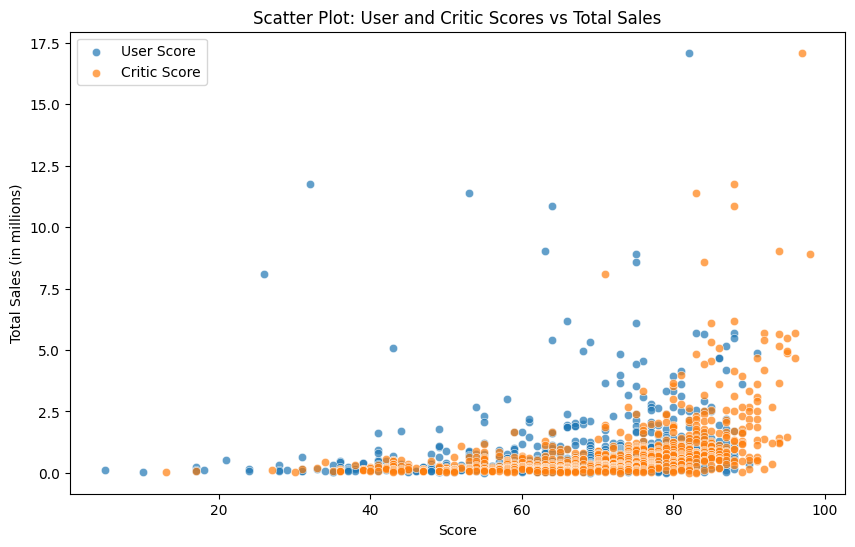

In [82]:
#filter platform
platform_data = df[df['platform'] == 'PS3'].copy() # Make a copy to avoid SettingWithCopyWarning

#change 'tbd' type in user_score column
platform_data.loc[:,'user_score'] = pd.to_numeric(ps3_data['user_score'], errors='coerce')

#filter out rows where 'user_score' or 'critic_score' is NaN
platform_data = platform_data.dropna(subset = ['user_score', 'critic_score', 'total_sales'])

#Scale user_score
platform_data['user_score'] = platform_data['user_score'] * 10

#plot scatterplot
plt.figure(figsize=(10,6))
sns.scatterplot(x='user_score', y='total_sales', data=platform_data, label='User Score', alpha=0.7)
sns.scatterplot(x='critic_score', y='total_sales', data=platform_data, label='Critic Score', alpha=0.7)
plt.xlabel('Score')
plt.ylabel('Total Sales (in millions)')
plt.title(f'Scatter Plot: User and Critic Scores vs Total Sales')
plt.legend()
plt.show()


We can see that the user score has slight positive correlation and the critic score is a little bit better but neither are very strong. 

<br>

## Sales across all platforms
Let's compare sales across all platforms

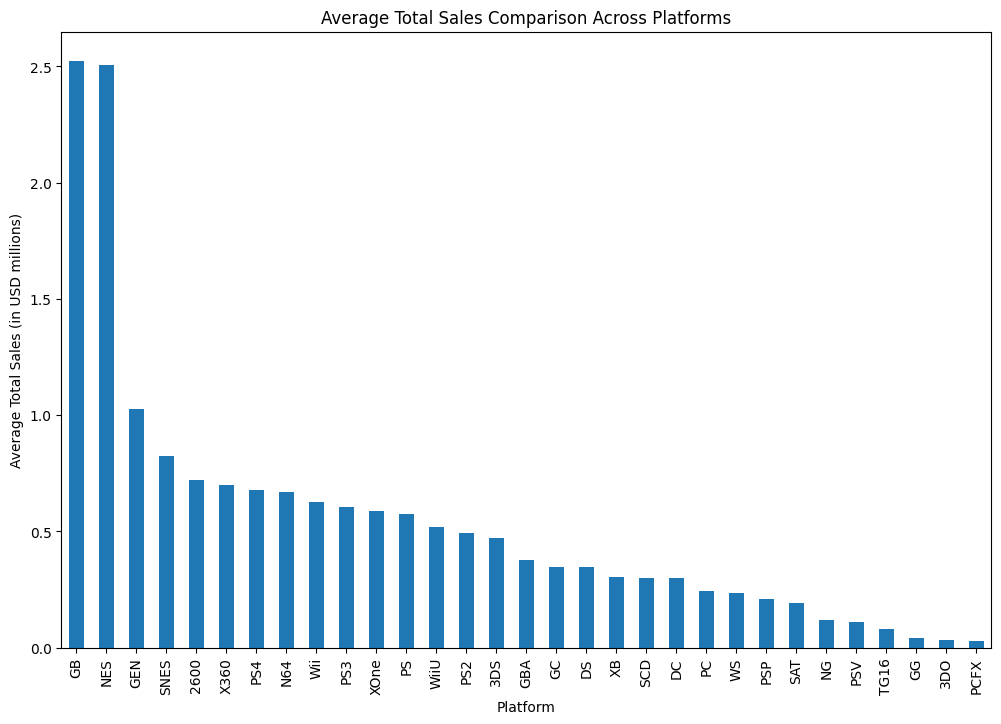

In [83]:
# Create a bar chart for average sales across different platforms
average_sales_by_platform = df.groupby('platform')['total_sales'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
average_sales_by_platform.plot(kind='bar')
plt.xlabel('Platform')
plt.ylabel('Average Total Sales (in USD millions)')
plt.title('Average Total Sales Comparison Across Platforms')
plt.show()

Gameboy (GB: also a product of Nintendo) and Nintendo (NES) are the top selling platforms overall.

<br>

## Sales by Genre
What genre has the highest sales?

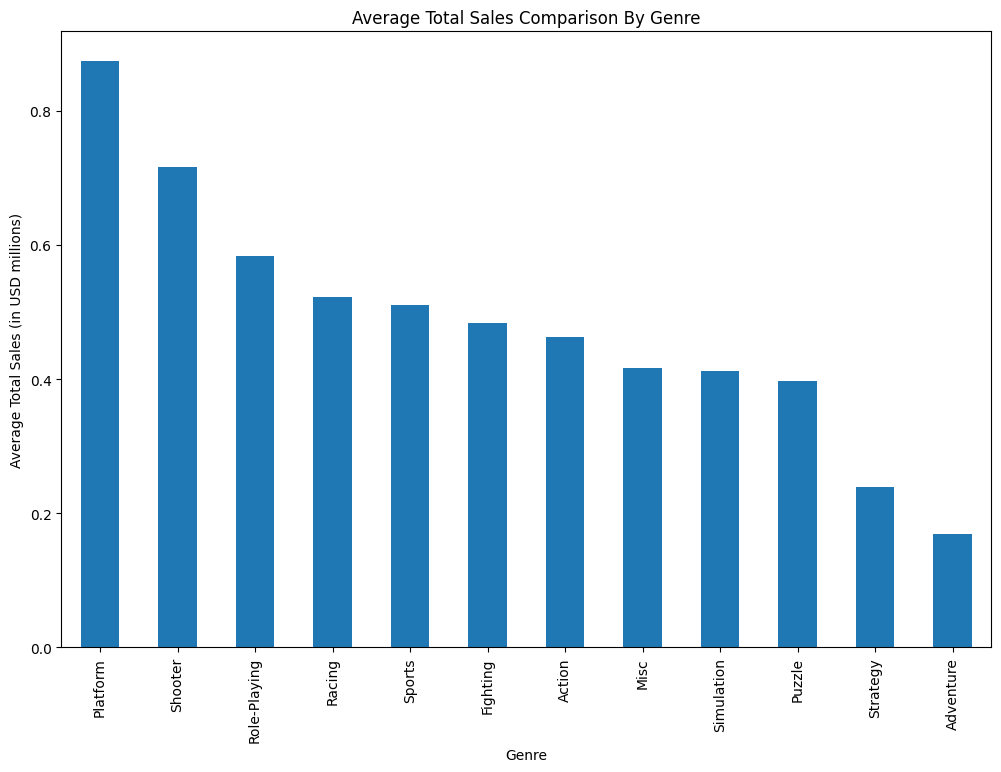

In [84]:
# Create a bar chart for average sales across different genres
average_sales_by_genre = df.groupby('genre')['total_sales'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
average_sales_by_genre.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Average Total Sales (in USD millions)')
plt.title('Average Total Sales Comparison By Genre')
plt.show()

**Platform** genre (A platformer (also called a platform game, and sometimes a jump 'n' run game) is a sub-genre of action video games in which the core objective is to move the player character between points in an environment. ref(https://en.wikipedia.org/wiki/Platformer#:~:text=A%20platformer%20%28also%20called%20a%20platform%20game%2C%20and,the%20player%20character%20between%20points%20in%20an%20environment.) 
<br>
The Platform genre is the most popular video game genre.
<br>

**Adventure** is the least popular video game genre

<br>

# Sales by Region
We'll look at sales for each region (NA, EU, JP) and determine:
<br>
- The top five platforms 
- Top 5 genres
- If ESRB ('rating') affects sales

### Top Platforms in Each Region

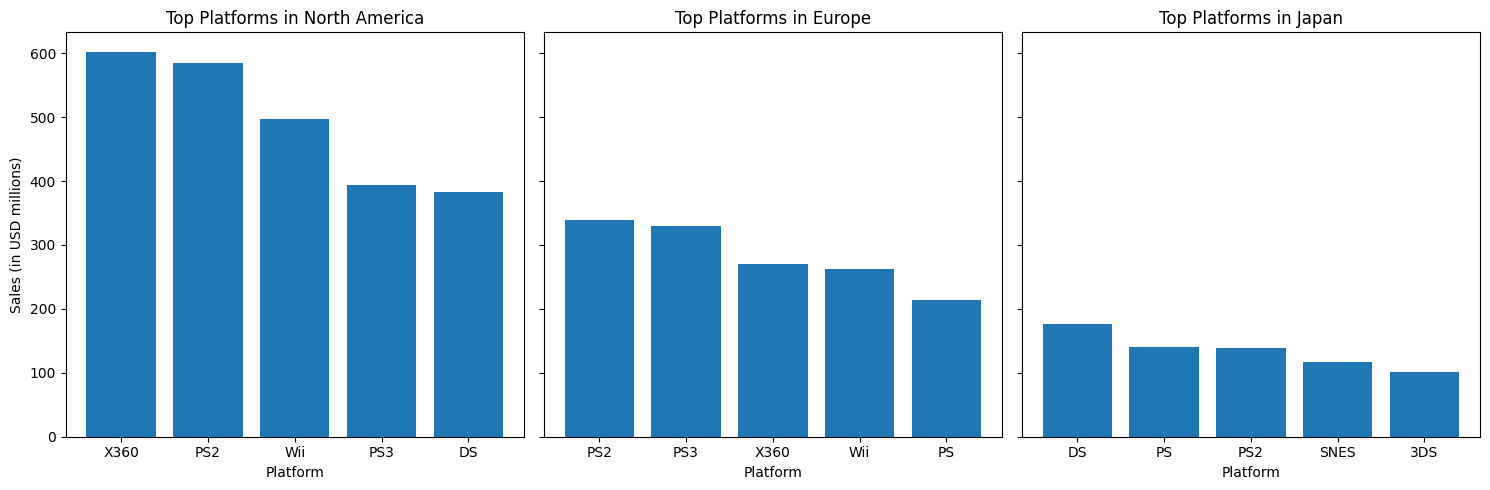

In [85]:
#create variables for top selling platforms for each region
na_top_platforms = df.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head()
eu_top_platforms = df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head()
jp_top_platforms = df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head()


# Create subplots for the three bar charts
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Plot the bar chart for North America
axs[0].bar(na_top_platforms.index, na_top_platforms.values)
axs[0].set_title('Top Platforms in North America')
axs[0].set_xlabel('Platform')
axs[0].set_ylabel('Sales (in USD millions)')

# Plot the bar chart for Europe
axs[1].bar(eu_top_platforms.index, eu_top_platforms.values)
axs[1].set_title('Top Platforms in Europe')
axs[1].set_xlabel('Platform')

# Plot the bar chart for Japan
axs[2].bar(jp_top_platforms.index, jp_top_platforms.values)
axs[2].set_title('Top Platforms in Japan')
axs[2].set_xlabel('Platform')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

**Top Selling Platform Across All Regions:** PS2. Playstation platforms in general are popular amongst all regions. 
<br>

**Highest Selling Region Overall:** North America. North American video game sales are 3x's higher than all of Japan sales. The lowest selling platform in North America exceeds the highest selling platforms in Europe and Japan.
<br>

**Most Popular Platforms Globally:** Playstation, X360, DS

<br>

### Top Genres by Region

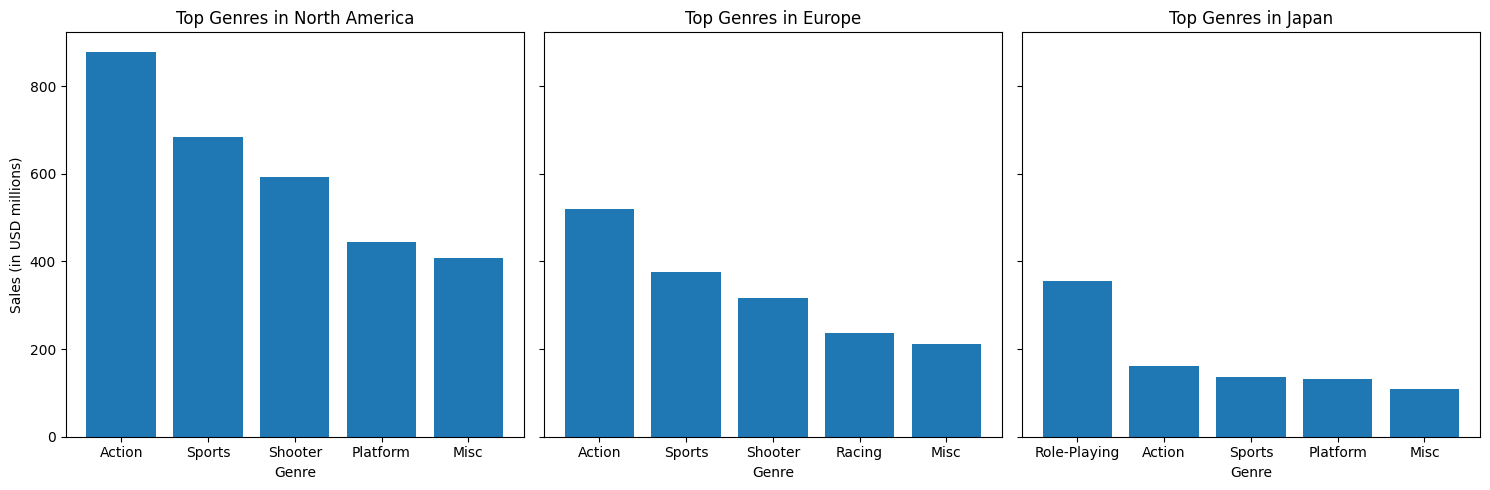

In [86]:
#create variables for top selling genres for each region
na_top_genres = df.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head()
eu_top_genres = df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head()
jp_top_genres = df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head()


# Create subplots for the three bar charts
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Plot the bar chart for North America
axs[0].bar(na_top_genres.index, na_top_genres.values)
axs[0].set_title('Top Genres in North America')
axs[0].set_xlabel('Genre')
axs[0].set_ylabel('Sales (in USD millions)')

# Plot the bar chart for Europe
axs[1].bar(eu_top_genres.index, eu_top_genres.values)
axs[1].set_title('Top Genres in Europe')
axs[1].set_xlabel('Genre')

# Plot the bar chart for Japan
axs[2].bar(jp_top_genres.index, jp_top_genres.values)
axs[2].set_title('Top Genres in Japan')
axs[2].set_xlabel('Genre')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

**#1 Action** is the top selling genre in both North America and Europe. It is second highest selling in Japan where Role-Playing is the highest selling genre in Japan.

<br>

**Common Genres** Action and Sports genres are common top sellers amongst all regions. Misc is among all 3 regions but we aren't sure what all falls into this category.

<br>
North America and Europe have the same 3 highest selling genres with the highest being Action, second Sports, and third Shooter.

<br>

### Sales vs. Ratings

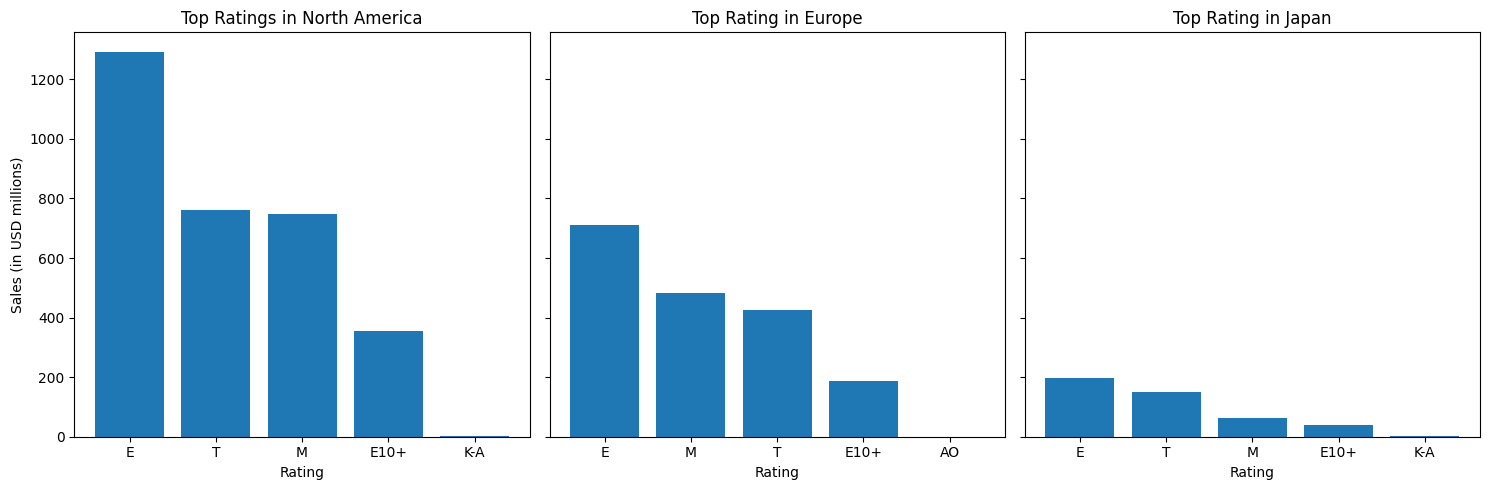

In [87]:
#create variables for top selling ratings for each region
na_top_rating = df.groupby('rating')['na_sales'].sum().sort_values(ascending=False).head()
eu_top_rating = df.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).head()
jp_top_rating = df.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).head()


# Create subplots for the three bar charts
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Plot the bar chart for North America
axs[0].bar(na_top_rating.index, na_top_rating.values)
axs[0].set_title('Top Ratings in North America')
axs[0].set_xlabel('Rating')
axs[0].set_ylabel('Sales (in USD millions)')

# Plot the bar chart for Europe
axs[1].bar(eu_top_rating.index, eu_top_rating.values)
axs[1].set_title('Top Rating in Europe')
axs[1].set_xlabel('Rating')

# Plot the bar chart for Japan
axs[2].bar(jp_top_rating.index, jp_top_rating.values)
axs[2].set_title('Top Rating in Japan')
axs[2].set_xlabel('Rating')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

Rating E(for Everyone) is the highest selling rating amongst all regions. 

<br>
T(teen), M(mature), and E10+ ratings are the next top selling ratings amongst all regions.

<br>
Adult only content has almost no data for sales.

<br>
If something is rated E, T, M, or E10+, it is more likely to sell compared to adult only content.

<br>

## Testing Hypotheses
In this section we'll test the following hypotheses:
<br>

1.**Average user ratings of the Xbox One and PC platforms are the same.**
<br>
Null Hypotheses 1: The average user ratings of the Xbox One and PC platforms are equal.
<br>
Alternative Hypotheses: The average user ratings of the Xbox One and PC platforms are not the equal.

<br>

2.**Average user ratings for the Action and Sports genres are different.**<br>
Null Hypotheses 2: The average user ratings for the Action and Sports genres are equal.
<br>
Alternative Hypotheses: Average user ratings for the Action and Sports genres are not equal.<br>


**Significance Level:** 0.05 (not too lenient, not too strict)

<br>

**Test 1**

In [88]:
#Change user_score tbd type 
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

#drop rows with nan values in the 'user_score' column
df = df.dropna(subset=['user_score'])


#Create average user ratings variable for Xbox One and PC platforms
XOne_ratings = df[df['platform'] == 'XOne']['user_score']
PC_ratings = df[df['platform'] == 'PC']['user_score']


#set significance level
alpha = 0.05

#test
results = st.ttest_ind(XOne_ratings, PC_ratings, equal_var=False)

#show results
print('p-value:', results.pvalue)


if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 4.935072360183574e-06
We reject the null hypothesis


**Results** With a p-value of 4.935 We reject the null hypotheses. There is evidence to support the alternative hypothesis, indicating that the average user ratings for the Xbox One and PC platforms are different.

<br>

**Test 2**

In [89]:
#Change user_score tbd type 
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

#drop rows with nan values in the 'user_score' column
df = df.dropna(subset=['user_score'])


#Create average user ratings variable for Xbox One and PC platforms
action_genre = df[df['genre'] == 'Action']['user_score']
sports_genre = df[df['genre'] == 'Sports']['user_score']


#set significance level
alpha = 0.05

#test
results = st.ttest_ind(action_genre, sports_genre, equal_var=True)

#show results
print('p-value:', results.pvalue)


if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 0.10406951359049141
We can't reject the null hypothesis


**Results:** With a p-value of 0.1041, we cannot reject the null hypotheses. There is not enough sufficient evidence to claim that the average user ratings for the Action and Sports genres are different. 

<br>

# Conclusion

The height of video game popularity was in the years 2000-2010. A gaming console's lifespan is about 10 years before it stops selling and a new one takes it's place. In those ten years, it's peak sales are from years 2-7, giving it a good 5 year run. Xbox, Nintendo, PlayStation, and Wii are the most popular platforms globally. We can expect the new PS4 console will be a top seller for games in 2017. As far as scores and ratings go, user scores have almost no effect on the sales of a game. Critic scores have a small effect, so the higher the critic score, the better the sales. ESRB rating categories for best sales are E, T, M, & E10+. Action and Sports genres are both highly successful genres. Platform and shooter games also do well. 

<div class="alert alert-block alert-success">
<b>Overall reviewer's comment</b> <a class="tocSkip"></a>
    
Rachel, thank you for sending your project. You've done a really good job on it!

Especially impressed:

- very deep detailed conclusions
    
- good graphs
    
- high code level

- good project structure
    
    
Thank you for in-depth analysis and logical conclusions!
    
I'm glad to say that your project has been accepted. Keep up the good work, and good luck on the next sprint!
    
</div>